In [1]:
# IMPORTING required modules from library

import pandas as pd
import numpy as np

In [2]:
# reading the data to df_book from file
df_book = pd.read_csv('book.csv')

In [6]:
# Checking data
df_book.head()

# data is already transformed 

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
df_book.shape

(2000, 11)

In [4]:
#number of unique users in the dataset
len(df_book.index.unique())

2000

In [5]:
df_book.isna().sum()

# checking for null values 
# no null values exists

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
#for Calculating Cosine Similarity between Users downloading required modules

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [7]:
# plotting pairwise distances using cosine similarity
# subtracting from one provides direct relation

ind_sim = 1 - pairwise_distances( df_book.values,metric='cosine')

In [8]:
ind_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [9]:
#Stoing the values in a dataframe
ind_sim_df = pd.DataFrame(ind_sim)

In [10]:
#Setting  the index and column names to user ids so that it can be easy to corelate

ind_sim_df.columns = ind_sim_df.index

In [11]:
ind_sim_df.iloc[0:5, 0:5]

,0,1,2,3,4
0,1.000000,0.000000,0.0,0.516398,0.408248
1,0.000000,1.000000,0.0,0.447214,0.000000
2,0.000000,0.000000,1.0,0.000000,0.000000
3,0.516398,0.447214,0.0,1.000000,0.632456
4,0.408248,0.000000,0.0,0.632456,1.000000


In [12]:
#as diagnal values are relation between its we can remove them and put zero
np.fill_diagonal(ind_sim, 0)
ind_sim_df.iloc[0:5, 0:5]

,0,1,2,3,4
0,0.000000,0.000000,0.0,0.516398,0.408248
1,0.000000,0.000000,0.0,0.447214,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000
3,0.516398,0.447214,0.0,0.000000,0.632456
4,0.408248,0.000000,0.0,0.632456,0.000000


In [36]:
#To get the most similar users we can check for the cosine values for each row
# and print its index vales

idsim = ind_sim_df.idxmax(axis=1)[0:99]

In [37]:
idsim.head()

# as swon below user zero is close to user 231 and so on..


0    231
1     21
2      0
3    158
4     11
dtype: int64

In [18]:
# selecting user zero

ind_0=pd.DataFrame(df_book.iloc[0])

In [19]:
# selecting user 231

ind_231=pd.DataFrame(df_book.iloc[231])

In [21]:
# joining both users for comparison

ind_0_231 = (pd.concat([ind_0, ind_231], join = 'outer', axis =1)).T

In [22]:
ind_0_231

# as we can see from the bottom both users matched on all accounts

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
231,0,1,0,1,0,0,1,0,0,0,0


In [27]:
# comparing the same fo other use pairs
for i in range(0,9):
    ind_ =pd.DataFrame(df_book.iloc[i])
    ind_s=pd.DataFrame(df_book.iloc[idsim[i]])
    ind_c = (pd.concat([ind_, ind_s], join = 'outer', axis =1)).T
    print('Similarity Data frame:\n', '-------'*15,'\n', ind_c)
 

Similarity Data frame:
 --------------------------------------------------------------------------------------------------------- 
      ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
0           0         1        0         1       0       0        1         0   
231         0         1        0         1       0       0        1         0   

     ItalAtlas  ItalArt  Florence  
0            0        0         0  
231          0        0         0  
Similarity Data frame:
 --------------------------------------------------------------------------------------------------------- 
     ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
1          1         0        0         0       0       0        0         0   
21         1         0        0         0       0       0        0         0   

    ItalAtlas  ItalArt  Florence  
1           0        0         0  
21          0        0         0  
Similarity Data frame:
 --------------

In [ ]:
# we can check the same for every user

Text(0.5, 1.0, 'Nearest user Plot')

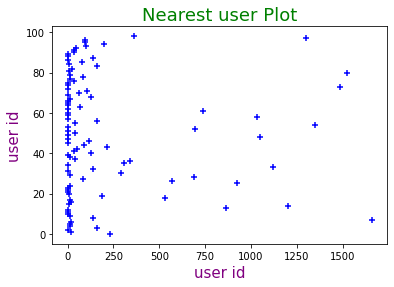

In [56]:
# plotting the newarest onefor first 100 users

import matplotlib.pyplot as plt
plt.scatter(idsim, idsim.index.values, color = 'blue', marker ='+')
plt.xlabel('user id', color = 'purple', size = 15)
plt.ylabel('user id', color = 'purple', size = 15)
plt.title('Nearest user Plot', color = 'green', size = 18)